## Project Description:

In this program, we aim to evaluate and compare the summarization capabilities of the Sumy library with two different neural network models for text summarization. Our project idea focuses on two main objectives:

Evaluating the feasibility of using news summaries for classification tasks instead of relying solely on the original news articles. By leveraging summarized versions of the news, we can potentially improve efficiency and reduce the computational resources required for classification.

Investigating the impact of various text cleaning techniques on the classification performance. By applying preprocessing and cleaning methods to the text data, we aim to analyze how these techniques affect the accuracy and reliability of the classification results.

Through this program, we seek to gain insights into the effectiveness and practicality of using news summaries and text cleaning techniques for classification tasks. The findings from this project can contribute to the development of more efficient and accurate text classification systems.

In [40]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sn
import neattext as nt
from colorama import Fore
from nltk import word_tokenize
import neattext.functions as nf
import matplotlib.pyplot as plt
from IPython.display import Image,display

In [41]:
from sklearn.svm import SVC,LinearSVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.layers.core import Dense,Flatten,Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score

In [42]:
import tensorflow as tf
from tensorflow.python.eager import context
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.python import pywrap_tensorflow as _pywrap_tensorflow
from keras.layers import Dropout,Activation,Bidirectional,GlobalMaxPool1D
from keras.layers import Input,Dense,Embedding,Flatten,BatchNormalization,Masking,GRU,LayerNormalization

In [132]:
import session_info
session_info.show()

In [43]:
#To get the same result after each run
random.seed(2)
np.random.seed(2)
tf.random.set_seed(2)

In [44]:
# Two different graphs to show the number of articles in each class
def pie_chart():
    count_category=df['Category'].value_counts()
    plt.figure(figsize=(4,4))
    colors=['#C71585','lightcyan','cyan','royalblue','darkblue']
    plt.pie(count_category.values,autopct='%1.1f%%',startangle=140,shadow=True,labels=['Business','Entertainment','Sport','Politics','Tech'],colors=colors)
    plt.title('Article Classes',size=10,color='g')
    plt.show()
    
def bar_chart():
    dc2.plot.bar()
    plt.tick_params(axis='x',rotation=30)
    plt.show()

In [45]:
#Calculate the evaluation for each model
def evaluate(model_name,X_test, y_test):
    score=model_name.evaluate(X_test, y_test, verbose=0)
    print(model_name.metrics_names[1], score[1]*100 , model_name.metrics_names[0], score[0]*100)

In [46]:
#Accuracy and loss plot of training and testing data for each model
def plot_loss_accuracy(ax):
    plt.subplots(1,3,figsize=(18,5))
    
    plt.subplot(1,3,1)
    plt.plot(ax.history['loss'],label='Loss')
    plt.plot(ax.history['accuracy'],label='Accuracy')
    plt.title('Train Data'),plt.xlabel('Epoch'),plt.ylabel('Accuracy & Loss')
    plt.legend()
    
    
    plt.subplot(1,3,2)
    plt.plot(ax.history['loss'],label='Train')
    plt.plot(ax.history['val_loss'],label='Test')
    plt.title('Loss(compare trane & test)'),plt.xlabel('Epoch'),plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1,3,3)
    plt.plot(ax.history['accuracy'], label='Train')
    plt.plot(ax.history['val_accuracy'], label='Test')
    plt.title('Accuracy(compare trane & test)'),plt.xlabel('Epoch'),plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

In [47]:
#Count the noises before and after cleaning the data
def count_noise():
    text_noise_befor_cleaning=df['Article'].apply(lambda x: nt.TextFrame(x).noise_scan()['text_noise']).sum()
    text_noise_after_cleaning=df['Clean'].apply(lambda x: nt.TextFrame(x).noise_scan()['text_noise']).sum()
    print(f'noise befor cleaning: {text_noise_befor_cleaning}')
    print(f'noise after cleaning: {text_noise_after_cleaning}')

In [48]:
#To convert y_test back to a list to use confusion_matrix
def decode_y(y):
    yd=pd.DataFrame({'1': y[:,0],
    '2':y[:,1],
    '3':y[:,2],
    '4':y[:,3],
    '5':y[:,4]})
    yd['2'].replace(1,2,inplace=True)
    yd['3'].replace(1,3,inplace=True)
    yd['4'].replace(1,4,inplace=True)
    yd['5'].replace(1,5,inplace=True)
    yd['6']=yd.max(axis=1)-1
    return yd['6'].to_numpy()

In [49]:
#plot confusion_matrix
def cm(model,X1_test,y1_test):
    pred=np.argmax(model.predict(X1_test), axis=-1)
    y1_test_decode=decode_y(y1_test)
    cm=confusion_matrix(y1_test_decode, pred)
    index=['Business','Entertainment','Politics','Sport','Tech']
    cm=pd.DataFrame(cm,columns=index,index=index)
    plt.tick_params(axis='x', rotation=40)
    sn.heatmap(cm, annot=True, fmt='d', cmap='PuBu')

In [50]:
#cleaning sample data
def clean(sam):
    sam=nf.remove_currencies(sam)
    sam=nf.remove_numbers(sam)
    sam=nf.remove_stopwords(sam)
    sam=nf.remove_multiple_spaces(sam)
    sam=nf.remove_special_characters(sam)
    return(sam)

In [51]:
#This function create having a token for sample data as same as train data 
def predict_decode(sam):
    df2=df.iloc[:,0]
    df2.loc[len(df2.index)] =sam
    tokenizer=Tokenizer(num_words=len(total_vocabulary2))
    tokenizer.fit_on_texts(df2)
    tokenized_texts=tokenizer.texts_to_sequences(df2)
    q=pad_sequences(tokenized_texts, maxlen=200)
    predict=np.argmax(model_best.predict([q[2224].tolist()]), axis=-1)
    if predict==0:
        p='business'
    elif predict==1:
        p='entertainment'
    elif predict==2:
        p='politics'
    elif predict==3:
        p='sport'
    elif predict==4:
        p='tech'
    print(f'This text is a < {p} > news')

In [52]:
#Calculate accuracy for several different machine learning models
def machine_learning_methods():
    def model(model_function,model_name,X_train, X_test, y_train, y_test):
        cv = CountVectorizer()
        X_train_cv = cv.fit_transform(X_train)
        X_test_cv = cv.transform(X_test)
        model=model_function
        model.fit(X_train_cv, y_train)
        y_pred = model.predict(X_test_cv)
        acc=accuracy_score(y_test, y_pred)
        return print(f'{model_name} Accuracy: {round(acc,4)}\n')
    X1_train, X1_test, y1_train, y1_test = train_test_split(df['Clean'],df['Category'], test_size=0.33, random_state=123)
    model(KNeighborsClassifier(),'KNN_Model',X1_train, X1_test,y1_train,y1_test)
    model(DecisionTreeClassifier(),'DecisionTree_Model',X1_train, X1_test,y1_train,y1_test)
    model(RandomForestClassifier(),'RandomForest_Model',X1_train, X1_test,y1_train,y1_test)

In [53]:
#Description for users how to see the results
def start():
    print(Fore.RESET+'\n\t\t\t\t BBC NEWS CLASSIFICATION')
    print('\t\t  Call below options from "whole_result()" function to see the results:')
    print(Fore.MAGENTA+'     '+17*'======',Fore.RESET)
    print('\tCount each classes in the article ======> \'ct\'\t\tCount data noise ==================> \'noi\'')
    print('\tModel\'s summary (News and sumy)=========> \'sy1\'\t\tModel\'s summary (clean news) ======> \'sy2\'')
    print('\tAccuracy/Loss plot (News and sumy)======> \'plt1\'\tAccuracy/Loss plot (clean news) ===> \'plt2\'')
    print('\tEvaluate (News and sumy) ===============> \'eva1\'\tEvaluate (clean news) =============> \'eva2\'')
    print('\tConfusion_matrix plot for best modle====> \'cm\'\t\tMachine learning methods result ===> \'ml\'')  

In [54]:
def finish():
    print(Fore.MAGENTA+'\t\t\t'+13*'===',Fore.RESET)
    print(Fore.RESET+'\t\t\tThank you very much for your attention.')
    print(Fore.MAGENTA+'\t\t\t'+13*'===',Fore.RESET)

In [55]:
#Reading the data and creating a dataframe
org_article=[]
data_path='/Users/najmehakbari/Downloads/BBC_News_Summary/BBC News Summary/News Articles'
for topic in os.listdir(data_path):
    topic_path=os.path.join(data_path,topic)
    if '.DS_Store' not in topic_path:
        for file_path in os.listdir(topic_path):
            try:
                with open(f'{topic_path}/{file_path}','r') as f:
                    org_article.append((f.read(),topic_path.split('/')[-1]))
            except UnicodeDecodeError :
                print(f'file {file_path} in {topic_path} not readable')
df=pd.DataFrame(org_article,columns=['Article','Category'])

file .DS_Store in /Users/najmehakbari/Downloads/BBC_News_Summary/BBC News Summary/News Articles/sport not readable


In [56]:
#Group data for plotting
dc=df.groupby('Category').count().sort_values('Article',ascending=False)
name={'business':'Business-0','entertainment':'Entertainment-1','politics':'Politics-2','sport':'Sport-3','tech':'Tech-4'}
dc2=dc.rename(name,axis=0)

In [57]:
#Replace class names with numeric variables
df['Category']=df['Category'].replace(['business','entertainment','politics','sport','tech'],[0,1,2,3,4])

In [58]:
#Cleaning texts by removing numbers, currency, extra spaces and stopwords
df['Clean']=df['Article'].apply(nf.remove_currencies)
df['Clean']=df['Clean'].apply(nf.remove_numbers)
df['Clean']=df['Clean'].apply(nf.remove_stopwords)
df['Clean']=df['Clean'].apply(nf.remove_multiple_spaces)
df['Clean']=df['Clean'].apply(nf.remove_special_characters)
df['Clean']=df['Clean'].apply(lambda x: nf.remove_custom_pattern(x,term_pattern=r'%'))
df['Clean']=df['Clean'].apply(lambda x: nf.remove_custom_pattern(x,term_pattern=r'  '))

In [59]:
#Apply tokenizer to original articles
data1=df['Article'].apply(word_tokenize).values
data2=df['Clean'].apply(word_tokenize).values

total_vocabulary1=set(word.lower() for line in data1 for word in line)
total_vocabulary2=set(word.lower() for line in data2 for word in line)

target=df['Category'].astype('int32')
y=pd.get_dummies(target).values

tokenizer=Tokenizer(num_words=len(total_vocabulary1))

tokenizer.fit_on_texts(df['Article'])
tokenized_texts=tokenizer.texts_to_sequences(df['Article'])
X=pad_sequences(tokenized_texts, maxlen=200)

### First Model

In [61]:
#The first model for which the entry is the main news
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2150) 
model_befor_cleaning=Sequential() 
embedding_size=128 
model_befor_cleaning.add(Embedding(len(total_vocabulary1)+1,embedding_size)) 
model_befor_cleaning.add(GlobalMaxPool1D())
model_befor_cleaning.add(Dense(32,activation='relu'))
model_befor_cleaning.add(Dense(5,activation='softmax'))

In [62]:
#I used a callback to avoid wasting time
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=50)
model_befor_cleaning.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model_befor_cleaning_plot=model_befor_cleaning.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=32,batch_size=10,shuffle=True,callbacks=callback)

Epoch 1/32
167/167 [==============================] - 2s 13ms/step - loss: 1.5914 - accuracy: 0.2522 - val_loss: 1.4369 - val_accuracy: 0.5953
Epoch 2/32
167/167 [==============================] - 2s 13ms/step - loss: 1.2298 - accuracy: 0.7344 - val_loss: 0.6462 - val_accuracy: 0.9245
Epoch 3/32
167/167 [==============================] - 2s 13ms/step - loss: 0.3951 - accuracy: 0.9725 - val_loss: 0.2825 - val_accuracy: 0.9424
Epoch 4/32
167/167 [==============================] - 2s 13ms/step - loss: 0.1171 - accuracy: 0.9882 - val_loss: 0.2074 - val_accuracy: 0.9460
Epoch 5/32
167/167 [==============================] - 2s 14ms/step - loss: 0.0470 - accuracy: 0.9992 - val_loss: 0.1760 - val_accuracy: 0.9460
Epoch 6/32
167/167 [==============================] - 2s 15ms/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 0.1594 - val_accuracy: 0.9604
Epoch 7/32
167/167 [==============================] - 2s 13ms/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.1541 - val_accuracy: 0.9496

In [63]:
model_befor_cleaning.save('model_not_clean.h5')
eva1=model_befor_cleaning.evaluate(x=X_test,y=y_test)

18/18 [==============================] - 0s 824us/step - loss: 0.1561 - accuracy: 0.9496


### Sumy Model

In [65]:
#importing sumary news in new table. I try all diffrent model and was the best. So I tried use summary insted of mean news
sumy_news=pd.read_csv('sumy.news.csv',usecols=['LexRankS','LuhnS','LsaS','KLS'])
sumy_news['clean']=sumy_news['LuhnS'].apply(nf.remove_currencies)
sumy_news['clean']=sumy_news['LuhnS'].apply(nf.remove_numbers)
sumy_news['clean']=sumy_news['LuhnS'].apply(nf.remove_stopwords)
sumy_news['clean']=sumy_news['LuhnS'].apply(nf.remove_multiple_spaces)
sumy_news['clean']=sumy_news['LuhnS'].apply(nf.remove_special_characters)
sumy_news['clean']=sumy_news['LuhnS'].apply(lambda x: nf.remove_custom_pattern(x,term_pattern=r'  '))

In [66]:
# New models by summery
data=sumy_news['LuhnS'].apply(word_tokenize).values
total_vocabulary=set(word.lower() for line in data for word in line)
tokenizer=Tokenizer(num_words=len(total_vocabulary))
tokenizer.fit_on_texts(sumy_news['LuhnS'])
tokenized_texts=tokenizer.texts_to_sequences(sumy_news['LuhnS'])
X=pad_sequences(tokenized_texts, maxlen=80)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2150)
model=Sequential()
embedding_size=128
model.add(Embedding(len(total_vocabulary)+1,embedding_size))
model.add(GlobalMaxPool1D())
model.add(Dense(32,activation='relu'))
model.add(Dense(5,activation='softmax'))
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=50)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model_plot=model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=callback,epochs=200,batch_size=32,shuffle=True)


Epoch 1/200
53/53 [==============================] - 1s 8ms/step - loss: 1.5995 - accuracy: 0.2314 - val_loss: 1.5564 - val_accuracy: 0.4353
Epoch 2/200
53/53 [==============================] - 0s 7ms/step - loss: 1.5119 - accuracy: 0.4578 - val_loss: 1.4179 - val_accuracy: 0.5737
Epoch 3/200
53/53 [==============================] - 0s 7ms/step - loss: 1.2674 - accuracy: 0.7869 - val_loss: 1.0334 - val_accuracy: 0.8237
Epoch 4/200
53/53 [==============================] - 0s 6ms/step - loss: 0.7351 - accuracy: 0.9570 - val_loss: 0.6084 - val_accuracy: 0.9101
Epoch 5/200
53/53 [==============================] - 0s 7ms/step - loss: 0.3008 - accuracy: 0.9911 - val_loss: 0.4086 - val_accuracy: 0.9245
Epoch 6/200
53/53 [==============================] - 0s 6ms/step - loss: 0.1274 - accuracy: 0.9963 - val_loss: 0.3282 - val_accuracy: 0.9281
Epoch 7/200
53/53 [==============================] - 0s 6ms/step - loss: 0.0648 - accuracy: 1.0000 - val_loss: 0.2888 - val_accuracy: 0.9281
Epoch 8/200
5

In [67]:
model.save('model.h5')
eva4=model.evaluate(x=X_test,y=y_test)

18/18 [==============================] - 0s 568us/step - loss: 0.2070 - accuracy: 0.9406


In [68]:
#*********************************************** Clean Model *********************************************************#

In [69]:
#Apply tokenizer to clean articles
tokenizer=Tokenizer(num_words=len(total_vocabulary2))
tokenizer.fit_on_texts(df['Clean'])
tokenized_texts=tokenizer.texts_to_sequences(df['Clean'])
X=pad_sequences(tokenized_texts, maxlen=200)
X1_train,X1_test,y1_train,y1_test=train_test_split(X,y,test_size=0.25,random_state=2150)

In [70]:
#I used exactly the same layers for the clean article so I could compare
model_after_cleaning=Sequential()
embedding_size=128
model_after_cleaning.add(Embedding(len(total_vocabulary2)+1,embedding_size))
model_after_cleaning.add(GlobalMaxPool1D())
model_after_cleaning.add(Dense(32,activation='relu'))
model_after_cleaning.add(Dense(5,activation='softmax'))

In [71]:
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=50)
model_after_cleaning.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model_after_cleaning_plot=model_after_cleaning.fit(X1_train,y1_train,validation_data=(X1_test,y1_test),epochs=200,batch_size=32,shuffle=True,callbacks=callback)

Epoch 1/200
53/53 [==============================] - 1s 14ms/step - loss: 1.5922 - accuracy: 0.2953 - val_loss: 1.5262 - val_accuracy: 0.4281
Epoch 2/200
53/53 [==============================] - 1s 13ms/step - loss: 1.4642 - accuracy: 0.5391 - val_loss: 1.2766 - val_accuracy: 0.7536
Epoch 3/200
53/53 [==============================] - 1s 12ms/step - loss: 1.1020 - accuracy: 0.8815 - val_loss: 0.8035 - val_accuracy: 0.9371
Epoch 4/200
53/53 [==============================] - 1s 13ms/step - loss: 0.5762 - accuracy: 0.9814 - val_loss: 0.4305 - val_accuracy: 0.9550
Epoch 5/200
53/53 [==============================] - 1s 13ms/step - loss: 0.2413 - accuracy: 0.9908 - val_loss: 0.2698 - val_accuracy: 0.9640
Epoch 6/200
53/53 [==============================] - 1s 13ms/step - loss: 0.1153 - accuracy: 0.9881 - val_loss: 0.2003 - val_accuracy: 0.9676
Epoch 7/200
53/53 [==============================] - 1s 13ms/step - loss: 0.0645 - accuracy: 0.9911 - val_loss: 0.1685 - val_accuracy: 0.9712
Epoch 

In [72]:
model_after_cleaning.save('model_clean.h5')
eva2=model_after_cleaning.evaluate(x=X1_test,y=y1_test)

18/18 [==============================] - 0s 790us/step - loss: 0.1101 - accuracy: 0.9676


### Best Model

In [74]:
#I continued to work with clean data and tried to improve the model. 
#I applied many models and this is the best model.
model_best=Sequential()
embedding_size=200
model_best.add(Embedding(len(total_vocabulary2)+1,embedding_size))
model_best.add(Masking(mask_value=0.0))
model_best.add(GlobalMaxPool1D())
model_best.add(Dense(45,activation='relu'))
model_best.add(Dropout(0.45))
model_best.add(Dense(5,activation='softmax'))

In [75]:
model_best.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=50)
model_best_plot=model_best.fit(X1_train,y1_train,validation_data=(X1_test,y1_test),epochs=200,batch_size=2**5,shuffle=True,callbacks=callback)

Epoch 1/200
53/53 [==============================] - 1s 22ms/step - loss: 1.5972 - accuracy: 0.2495 - val_loss: 1.5361 - val_accuracy: 0.4514
Epoch 2/200
53/53 [==============================] - 1s 20ms/step - loss: 1.4849 - accuracy: 0.4655 - val_loss: 1.3336 - val_accuracy: 0.5629
Epoch 3/200
53/53 [==============================] - 1s 20ms/step - loss: 1.2140 - accuracy: 0.6672 - val_loss: 0.8972 - val_accuracy: 0.8903
Epoch 4/200
53/53 [==============================] - 1s 20ms/step - loss: 0.7587 - accuracy: 0.8656 - val_loss: 0.4728 - val_accuracy: 0.9514
Epoch 5/200
53/53 [==============================] - 1s 20ms/step - loss: 0.3920 - accuracy: 0.9588 - val_loss: 0.2698 - val_accuracy: 0.9604
Epoch 6/200
53/53 [==============================] - 1s 20ms/step - loss: 0.2264 - accuracy: 0.9683 - val_loss: 0.1819 - val_accuracy: 0.9712
Epoch 7/200
53/53 [==============================] - 1s 20ms/step - loss: 0.1506 - accuracy: 0.9805 - val_loss: 0.1399 - val_accuracy: 0.9730
Epoch 

In [76]:
model_best.save('model_best.h5')
eva3=model_best.evaluate(x=X1_test,y=y1_test)

18/18 [==============================] - 0s 2ms/step - loss: 0.0963 - accuracy: 0.9784


In [77]:
model_not_clean=tf.keras.models.load_model('model_not_clean.h5')
model_clean=tf.keras.models.load_model('model_clean.h5')
model_best=tf.keras.models.load_model('model_best.h5')
model=tf.keras.models.load_model('model.h5')

In [130]:
#This is a function for easy use of all results. 
#Users can easily view any part of the result by calling any option described in the start function.
img=Image(filename='7887982.png')
def whole_result(step):
    if step=='start':
        return start()   
    elif step=='tb1':
        return df
    elif step=='tb2':
        return sumy_news
    elif step=='noi':
        display(img)
        print('   As we can see, by cleaning data, the noise is significantly reduced.\n')        
        return count_noise()
    elif step=='ct':
        display(img)
        print('   Data scatter is fair.')
        return pie_chart()
    elif step=='cm':
        cm(model_best,X1_test,y1_test) 
        display(img)
        print('   This model can predict every class very well. The best prediction is for sports class because the vocabulary of \n   this class is significantly different from other classes.')
    elif step=='sy1':
        print(Fore.MAGENTA+'\n\t_________ Model Summary (Original Data) _________\n'+Fore.RESET)
        model_not_clean.summary()
        print(Fore.MAGENTA+'\n\t_________ Model Summary (Summarized Data) _________\n'+Fore.RESET)
        model.summary()
    elif step=='sy2':
        print(Fore.MAGENTA+'\n\t_________ Model Summary (Original Data) _________\n'+Fore.RESET)
        model_not_clean.summary()
        print(Fore.MAGENTA+'\n\t_________ Model summary (Clean Data)  _________\n'+Fore.RESET)
        model_clean.summary() 
    elif step=='best':
        print(Fore.MAGENTA+'\n\t_________ Model summary (Best Model)  _________\n'+Fore.RESET)
        model_best.summary() 
        print(Fore.MAGENTA+'\n\t\t\t\t_________ Model Plot (Best Model) _________\n'+Fore.RESET)
        plot_loss_accuracy(model_best_plot) 
        print(f'The Best Model ==========> Accuracy: {eva3[1]*100} % , Loss: {eva3[0]}')
        display(img)
        print('   This is one of the best results.')
    elif step=='plt1':
        print(Fore.MAGENTA+'\n\t\t\t\t_________ Model Plot (Original Data) _________\n'+Fore.RESET)
        plot_loss_accuracy(model_befor_cleaning_plot)
        print(Fore.MAGENTA+'\n\t\t\t\t_________ Model Plot (Summarized Data) _________\n'+Fore.RESET)
        plot_loss_accuracy(model_plot)
    elif step=='plt2':
        print(Fore.MAGENTA+'\n\t\t\t\t_________ Model Plot (Original Data) _________\n'+Fore.RESET)
        plot_loss_accuracy(model_befor_cleaning_plot)
        print(Fore.MAGENTA+'\n\t\t\t\t_________ Model Plot (Clean Data) _________\n'+Fore.RESET)
        plot_loss_accuracy(model_after_cleaning_plot) 
    elif step=='eva1':
        print(f'Original Data ===========> Accuracy: {eva1[1]*100} % , Loss: {eva1[0]}')
        print(f'Summarized Data =========> Accuracy: {eva4[1]*100} % , Loss: {eva4[0]}')
        display(img)
        print('   By using summarized data, the parameters were significantly reduced, we only lost less than 1% accuracy and it was\n   worth it.')
    elif step=='eva2': 
        print(f'Original Data ===========> Accuracy: {eva1[1]*100} % , Loss: {eva1[0]}')
        print(f'Clean Data ==============> Accuracy: {eva2[1]*100} % , Loss: {eva2[0]}')
        display(img)
        print('   Cleaning data improves both accuracy and loss.')

    elif step=='ml':
        machine_learning_methods()
        display(img)
        print('   Random forest also gives good results for this data.')
    elif step=='p':
        predict_decode(sam)
    elif step=='fi':
        return finish()
    elif step=='con':
        dec="The Sumy algorithm is capable of preserving the main information within a text."/
        " By retaining up to 20% of the original content, the text remains reliable while reducing storage requirements."/
        " This trade-off becomes particularly valuable when working with large datasets, as the decrease in storage"/
        " outweighs the minimal 1% loss in accuracy. Additionally, cleaning the text by removing noise and irrelevant"/
        " information is crucial for achieving better results. It is highly recommended to clean the text before creating any models."
        print(dec)

# Results

In [79]:
start()


				 BBC NEWS CLASSIFICATION
		  Call below options from "whole_result()" function to see the results:
	Count each classes in the article ======> 'ct'		Count data noise ==================> 'noi'
	Model's summary (News and sumy)=========> 'sy1'		Model's summary (clean news) ======> 'sy2'
	Accuracy/Loss plot (News and sumy)======> 'plt1'	Accuracy/Loss plot (clean news) ===> 'plt2'
	Evaluate (News and sumy) ===============> 'eva1'	Evaluate (clean news) =============> 'eva2'
	Confusion_matrix plot for best modle====> 'cm'		Machine learning methods result ===> 'ml'


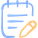

   Data scatter is fair


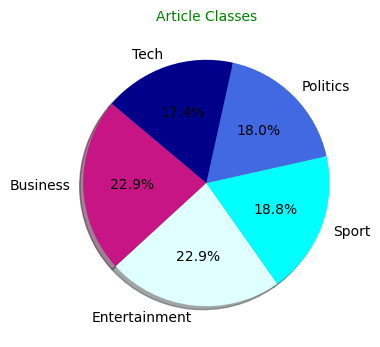

In [88]:
whole_result('ct')


	_________ Model Summary (Original Data) _________

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 128)         4427392   
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 165       
Total params: 4,431,685
Trainable params: 4,431,685
Non-trainable params: 0
_________________________________________________________________

	_________ Model Summary (Summarized Data) _________

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape     

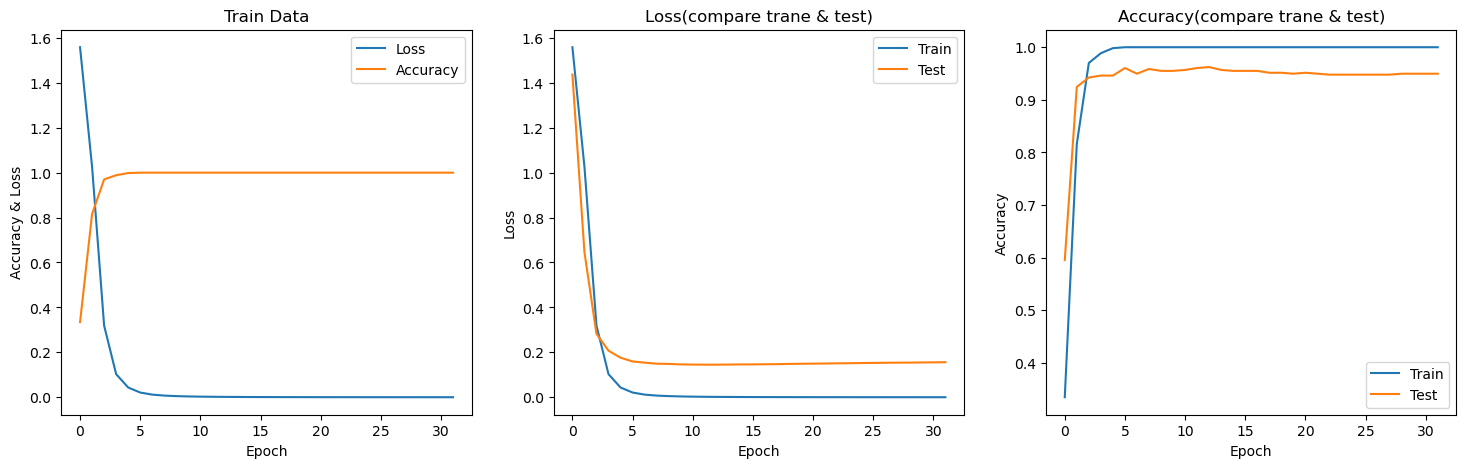


				_________ Model Plot (Summarized Data) _________



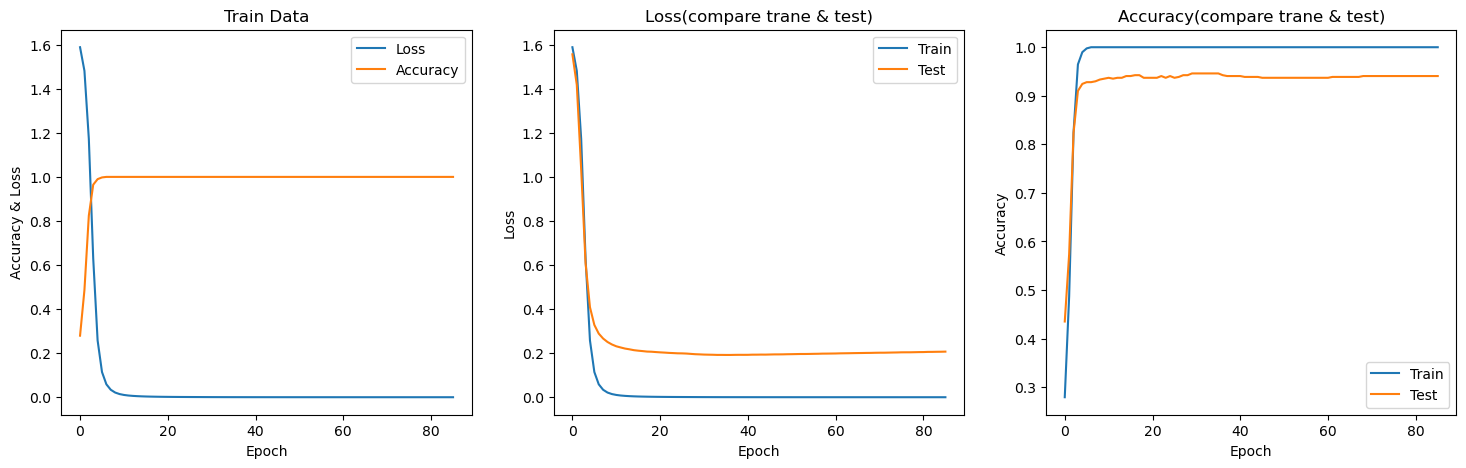

Original Data ===========> Accuracy: 94.96402740478516 % , Loss: 0.15605302155017853
Summarized Data =========> Accuracy: 94.06474828720093 % , Loss: 0.2069656252861023


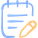

   By using summarized data, the parameters were significantly reduced, we only lost less than 1% accuracy and it was
   worth it.


(None, None, None)

In [115]:
whole_result('sy1'),whole_result('plt1'),whole_result('eva1')

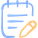

   As we can see, by cleaning data, the noise is significantly reduced.

noise befor cleaning: 22853.94579063944
noise after cleaning: 1122.3420934819483


In [104]:
whole_result('noi')


	_________ Model Summary (Original Data) _________

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 128)         4427392   
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 165       
Total params: 4,431,685
Trainable params: 4,431,685
Non-trainable params: 0
_________________________________________________________________

	_________ Model summary (Clean Data)  _________

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape         

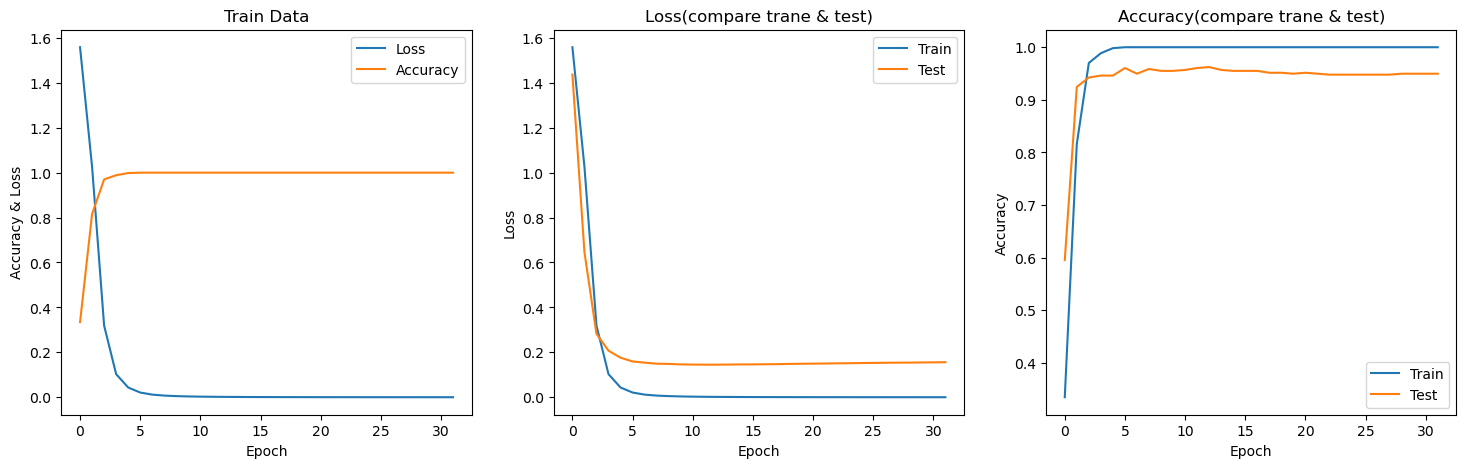


				_________ Model Plot (Clean Data) _________



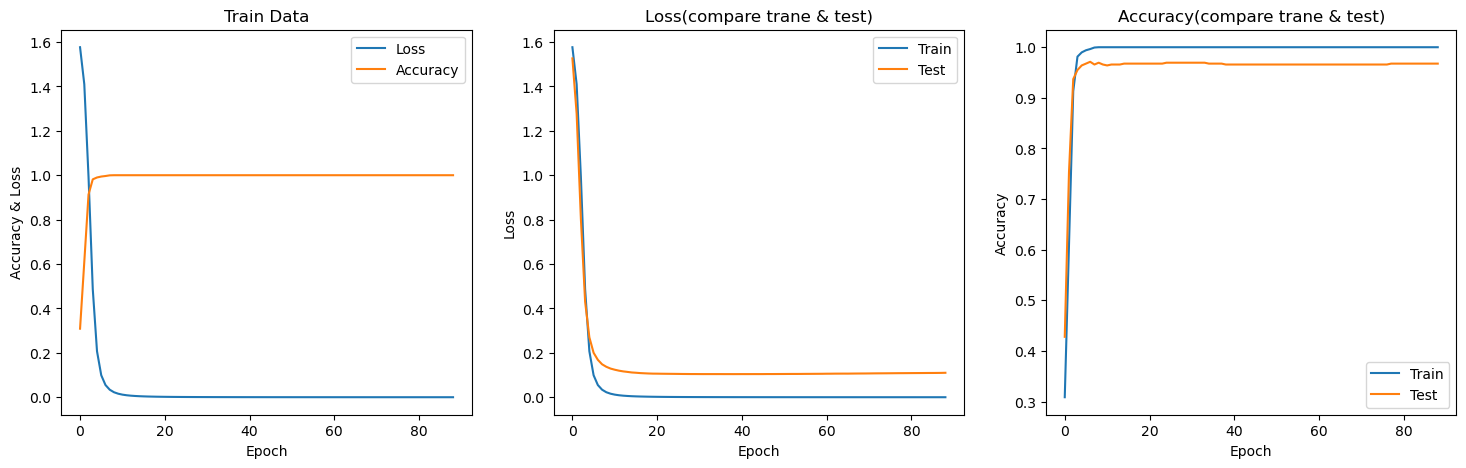

Original Data ===========> Accuracy: 94.96402740478516 % , Loss: 0.15605302155017853
Clean Data ==============> Accuracy: 96.76259160041809 % , Loss: 0.11010479182004929


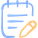

   Cleaning data improves both accuracy and loss.


(None, None, None)

In [105]:
whole_result('sy2'),whole_result('plt2'),whole_result('eva2')


	_________ Model summary (Best Model)  _________

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 200)         6298600   
_________________________________________________________________
masking_1 (Masking)          (None, None, 200)         0         
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 200)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 45)                9045      
_________________________________________________________________
dropout_1 (Dropout)          (None, 45)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 230       
Total params: 6,307,875
Trainable params: 6,307,875
Non-trainable par

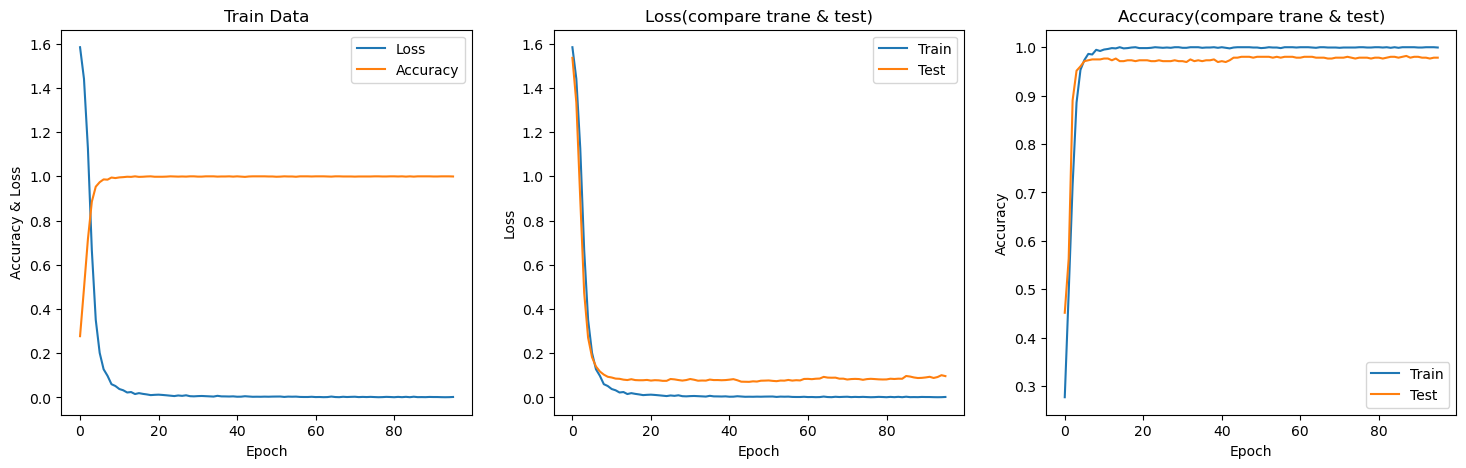

The Best Model ==========> Accuracy: 97.84172773361206 % , Loss: 0.09630423784255981


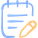

   This is one of the best results.


In [106]:
whole_result('best')

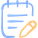

   This model can predict every class very well. The best prediction is for sports class because the vocabulary of 
   this class is significantly different from other classes.


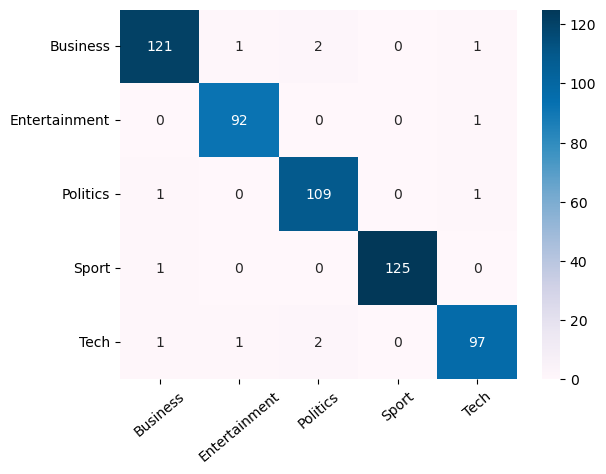

In [111]:
whole_result('cm')

KNN_Model Accuracy: 0.6008

DecisionTree_Model Accuracy: 0.8229

RandomForest_Model Accuracy: 0.9619



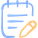

   Random forest also gives good results for this data.


In [117]:
whole_result('ml')

# Conclusion

=====================================================================================================================

The Sumy algorithm is capable of preserving the main information within a text. By retaining up to 20% of the original content, the text remains reliable while reducing storage requirements. This trade-off becomes particularly valuable when working with large datasets, as the decrease in storage outweighs the minimal 1% loss in accuracy. Additionally, cleaning the text by removing noise and irrelevant information is crucial for achieving better results. It is highly recommended to clean the text before creating any models.